In [2]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import scipy.stats as st
import pandas as pd
import os as os

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 120

In [ ]:
HostName = os.getenv ('HOSTNAME')

if HostName == "Server":
    Computer = "Desktop"   
elif HostName == 'bora.sciclone.wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [3]:
#Extra Headers:

#import statistics as st
import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
import time
import math

import pywt
from pywt._extensions._pywt import (DiscreteContinuousWavelet, ContinuousWavelet,
                                Wavelet, _check_dtype)
from pywt._functions import integrate_wavelet, scale2frequency 
from scipy.optimize import curve_fit


In [4]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/data10/dchendrickson01/SmallCopy/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'SmallCopy\\'

In [40]:
beta_a = 2
beta_b = 5
beta_cycles = 4
beta_sineCosine = 1


def BetaWavelet(sizes, a = beta_a, b = beta_b, sineCycle = beta_cycles, cosineCycle = 0):
    beta = np.zeros(sizes)
    beWave = np.zeros(sizes)
    x = np.zeros(sizes)
    for i in range(sizes):
        j = i / sizes
        beta[i] = st.beta.pdf(j,a,b)
        beWave[i] = beta[i] * math.sin(j*math.pi*sineCycle) * math.cos(j*math.pi*cosineCycle)
        x[i]=j

    beWav2 = beWave[::-1]
    return beWav2, x

In [42]:
math.cos(0)

1.0

In [6]:
def cwt_fixed(data, scales, wavelet, scalespace =1, sampling_period=1.):
    """
    COPIED AND FIXED FROM pywt.cwt TO BE ABLE TO USE WAVELET FAMILIES SUCH
    AS COIF AND DB

    COPIED From Spenser Kirn
    
    All wavelet work except bior family, rbio family, haar, and db1.
    
    cwt(data, scales, wavelet)

    One dimensional Continuous Wavelet Transform.

    Parameters
    ----------
    data : array_like
        Input signal
    scales : array_like
        scales to use
    wavelet : Wavelet object or name
        Wavelet to use
    sampling_period : float
        Sampling period for frequencies output (optional)

    Returns
    -------
    coefs : array_like
        Continous wavelet transform of the input signal for the given scales
        and wavelet
    frequencies : array_like
        if the unit of sampling period are seconds and given, than frequencies
        are in hertz. Otherwise Sampling period of 1 is assumed.

    Notes
    -----
    Size of coefficients arrays depends on the length of the input array and
    the length of given scales.

    Examples
    --------
    >>> import pywt
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> x = np.arange(512)
    >>> y = np.sin(2*np.pi*x/32)
    >>> coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
    >>> plt.matshow(coef) # doctest: +SKIP
    >>> plt.show() # doctest: +SKIP
    ----------
    >>> import pywt
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> t = np.linspace(-1, 1, 200, endpoint=False)
    >>> sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
    >>> widths = np.arange(1, 31)
    >>> cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
    >>> plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
    ...            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
    >>> plt.show() # doctest: +SKIP
    """
    
    #scales = get_primelist(10000)
    
    # accept array_like input; make a copy to ensure a contiguous array
    dt = _check_dtype(data)
    data = np.array(data, dtype=dt)
    if wavelet == 'beta':
        pass
    else:
        if not isinstance(wavelet, (ContinuousWavelet, Wavelet)):
            wavelet = DiscreteContinuousWavelet(wavelet)
    if np.isscalar(scales):
        scales = np.r_[1:scales+1] * scalespace
    if data.ndim == 1:
        try:
            if wavelet.complex_cwt:
                out = np.zeros((np.size(scales), data.size), dtype=complex)
            else:
                out = np.zeros((np.size(scales), data.size))
        except AttributeError:
            out = np.zeros((np.size(scales), data.size))
        precision = 10
        if wavelet == 'beta':
            int_psi, x = BetaWavelet(10000, 2,  5, 3, 2)
        else:    
            int_psi, x = integrate_wavelet(wavelet, precision=precision)
        step = x[1] - x[0]
        for i in np.arange(np.size(scales)):
            j = np.floor(
                np.arange(scales[i] * (x[-1] - x[0]) + 1) / (scales[i] * step))
            if np.max(j) >= np.size(int_psi):
                j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
            coef = - np.sqrt(scales[i]) * np.diff(np.convolve(data, int_psi[j.astype(int)][::-1]))
            d = (coef.size - data.size) / 2.
            out[i, :] = coef[int(np.floor(d)):int(-np.ceil(d))]
        #frequencies = scale2frequency(wavelet, scales, precision)
        #if np.isscalar(frequencies):
        #    frequencies = np.array([frequencies])
        #for i in np.arange(len(frequencies)):
        #    frequencies[i] /= sampling_period
        return out
    else:
        raise ValueError("Only dim == 1 supported")


In [7]:
WaveletToUse = 'gaus2'
#scales = np.linspace(0,2000,1001, dtype=int)
scales = 500
spacer = 10
    


def getThumbprint(data, wvt=WaveletToUse, ns=scales, scalespace = spacer, numslices=5, slicethickness=0.12, 
                  valleysorpeaks='both', normconstant=1, plot=False):
    '''
    Updated version of the DWFT function above that allows plotting of just
    valleys or just peaks or both. To plot just valleys set valleysorpeaks='valleys'
    to plot just peaks set valleysorpeaks='peaks' or 'both' to plot both.
    '''
    # First take the wavelet transform and then normalize to one
    if np.shape(data)[0] == 2:
        wvt = data[1]
        data = data[0]
    
    #try:
    cfX = cwt_fixed(data, ns, wvt,scalespace)
    cfX = np.true_divide(cfX, abs(cfX).max()*normconstant)

    ns = np.shape(cfX)[0]

    fp = np.zeros((len(data), ns), dtype=int)

    # Create the list of locations between -1 and 1 to preform slices. Valley
    # slices will all be below 0 and peak slices will all be above 0.
    if valleysorpeaks == 'both':
        slicelocations1 = np.arange(-1 ,0.0/numslices, 1.0/numslices)
        slicelocations2 = np.arange(1.0/numslices, 1+1.0/numslices, 1.0/numslices)
        slicelocations = np.array(np.append(slicelocations1,slicelocations2))

    if valleysorpeaks == 'peaks':
        slicelocations = np.arange(1.0/numslices, 1+1.0/numslices, 1.0/numslices)

    if valleysorpeaks == 'valleys':
        slicelocations = np.arange(-1, 0.0/numslices, 1.0/numslices)

    for loc in slicelocations:
        for y in range(0, ns):
            for x in range(0, len(data)):
                if cfX[y, x]>=(loc-(slicethickness/2)) and cfX[y,x]<= (loc+(slicethickness/2)):
                    fp[x,y] = 1

    fp = np.transpose(fp[:,:ns])
    #except:
    #    fp = 'fail'
    
    return fp

In [8]:
def RidgeCount(fingerprint):
    '''
    Count the number of times the fingerprint changes from 0 to 1 or 1 to 0 in 
    consective rows. Gives a vector representation of the DWFT
    '''
    diff = np.zeros((fingerprint.shape))
    
    for i, row in enumerate(fingerprint):
        if i==0:
            prev = row
        else:
            # First row (i=0) of diff will always be 0s because it does not
            # matter what values are present. 
            # First find where the rows differ
            diff_vec = abs(row-prev)
            # Then set those differences to 1 to be added later
            diff_vec[diff_vec != 0] = 1
            diff[i, :] = diff_vec
            
            prev = row
            
    ridgeCount = diff.sum(axis=0)
    
    return ridgeCount

In [29]:
def PlotFingerPrint(Input):
    
    #FpScat=fp.getLabeledThumbprint(data, FP,scales,slices)
    #print(np.shape(data)[1], scales)

    
    data = Input[0]
    title = Input[1]
    
    scales = np.shape(data)[0]
    trim=0
    slices = 3
    Show = True
    
    xName = np.arange(0,np.shape(data)[1]-2*trim,1)
    
    if trim == 0:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))
    else:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))

    

    fig1 = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
    ax1 = plt.axes()
    if trim == 0:
        cs1 = ax1.contourf(Al,Ms, data[:,:],cmap=my_cmap,levels=slices)
    else:
        cs1 = ax1.contourf(Al,Ms, data[:,trim:-trim],cmap=my_cmap,levels=slices)

    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    if Show: plt.show()
    else: plt.close(fig1)
        
    return 1

In [10]:
def getAcceleration(FileName):
    
        DataSet = np.genfromtxt(open(FileName,'r'), delimiter=',',skip_header=0)
        JustFileName = FileName.rsplit('/', 1)[-1]
        if FileName[-20:-16] == 'Gyro':
            return [False,FileName,False]
        else:
            if FileName[-6:-5] == 's':
                FileDate = FileName[-18:-7]
                sensor = FileName[-5:-4]
            elif FileName[-21:-16] == 'Accel':
                FileDate = FileName[-15:-4]
                sensor = 1
            else:
                FileDate = FileName[-20:-4]
                sensor = 1
            return [[FileDate, 'x',DataSet[:,2], sensor,JustFileName],[FileDate,'y',DataSet[:,3],sensor,JustFileName],[FileDate,'z',DataSet[:,4],sensor,JustFileName]]

def KalmanFilterDenoise(data, rate=1):

    #https://jamwheeler.com/college-productivity/how-to-denoise-a-1-d-signal-with-a-kalman-filter-with-python/
    #

    def oavar(data, rate, numpoints=30):

        x = np.cumsum(data)

        max_ratio = 1/9
        num_points = 30
        ms = np.unique(
            np.logspace(0, np.log10(len(x) * max_ratio), numpoints
           ).astype(int))        

        oavars = np.empty(len(ms))
        for i, m in enumerate(ms):
            oavars[i] = (
                (x[2*m:] - 2*x[m:-m] + x[:-2*m])**2
            ).mean() / (2*m**2)

        return ms / rate, oavars

    def ln_NKfit(ln_tau, ln_N, ln_K):
        tau = np.exp(ln_tau)
        N, K = np.exp([ln_N, ln_K])
        oadev = N**2 / tau + K**2 * (tau/3)
        return np.log(oadev)

    def get_NK(data, rate):
        taus, oavars = oavar(data, rate)

        ln_params, ln_varmatrix = (
            curve_fit(ln_NKfit, np.log(taus), np.log(oavars))
        )
        return np.exp(ln_params)    

    # Initialize state and uncertainty
    state = data[0]
    output = np.empty(len(data))

    #rate = 1 # We can set this to 1, if we're calculating N, K internally
    # N and K will just be scaled relative to the sampling rate internally
    dt = 1/rate

    N, K = get_NK(data, rate)

    process_noise = K**2 * dt
    measurement_noise = N**2 / dt

    covariance = measurement_noise

    for index, measurement in enumerate(data):
        # 1. Predict state using system's model

        covariance += process_noise

        # Update
        kalman_gain = covariance / (covariance + measurement_noise)

        state += kalman_gain * (measurement - state)
        covariance = (1 - kalman_gain) * covariance

        output[index] = state

    return output

In [13]:
file = '60kPoints-220111-1554-s2.csv'
file = '60kPoints-210916-0418-s1.csv'
file = '60kPoints-220208-1138-s3.csv'

In [14]:
Accels = getAcceleration(folder+file)

In [15]:
AllAccels = [Accels, Accels]

In [16]:
MetaData = []  #np.asarray([],dtype=object)
DataOnlyMatrix = np.asarray([],dtype=object)
for j in range(np.shape(AllAccels)[0]):
    if AllAccels[j][0] == False :
        if AllAccels[j][1][4:9] =='Accel':
            print(j,AllAccels[j][1])
    else: 
        for k in range(3):
            MetaData.append([AllAccels[j][k][0], AllAccels[j][k][1], AllAccels[j][k][3], AllAccels[j][k][4]])
            if np.size(DataOnlyMatrix) == 0:
                    DataOnlyMatrix =np.matrix(AllAccels[j][k][2])
            else:
                    DataOnlyMatrix = np.concatenate((DataOnlyMatrix,np.matrix(AllAccels[j][k][2])),axis=0)

MetaData = np.matrix(MetaData)

c:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [17]:
num_cores = 30
waveKalmaned = np.asarray([],dtype=object)
waveKalmaned = Parallel(n_jobs=num_cores)(delayed(KalmanFilterDenoise)(np.asarray(data).flatten()) for data in DataOnlyMatrix)
waveKalmaned = np.matrix(waveKalmaned)


In [18]:
length = np.shape(waveKalmaned)[0]
justifier = np.ones((length, np.shape(waveKalmaned)[1]))
average = np.zeros(length)
for i in range(length):
    average[i]= np.average(waveKalmaned[i][:])
justifier = justifier.T * average.T
waveKalmaned = waveKalmaned - justifier.T

In [19]:
maxes = np.amax(waveKalmaned[:,500:], axis = 1)
mins = np.amin(waveKalmaned[:,500:], axis = 1)

Keep = np.zeros(mins.size)
for i in range(mins.size):
    if i % 3 == 0:
        if maxes[i] > 0.01 and mins[i] < -0.01:
            Keep[i]=1
            #Keep[i+1]=1
            #Keep[i+2]=1
            print(i)
            

Keep = np.array(Keep, dtype='bool')
            
waveKalmaned = waveKalmaned[Keep,:]
MetaData = MetaData[Keep,:]

0
3


In [38]:
np.asarray(waveKalmaned[0]).flatten()

array([-0.00328929, -0.00304564, -0.00408689, ..., -0.03782349,
       -0.03752386, -0.03724603])

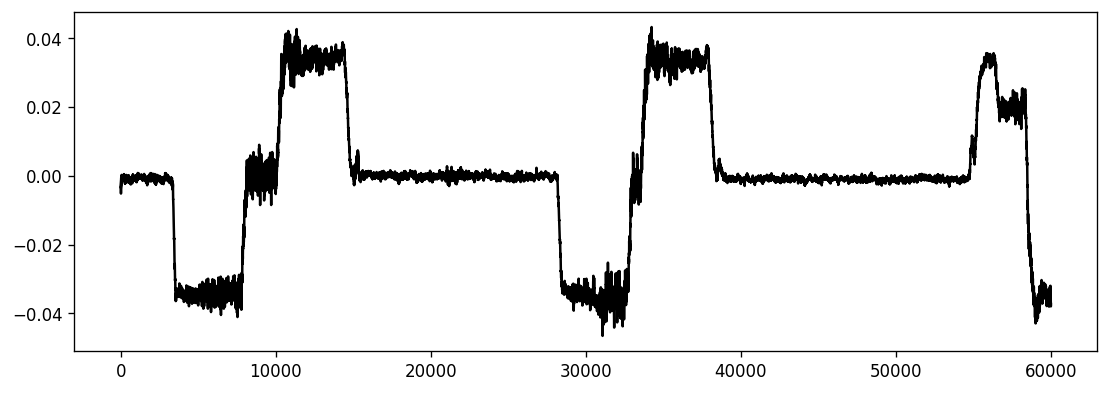

In [39]:
fig=plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(np.asarray(waveKalmaned[0]).flatten(), label = 'Smoothed Moved')
plt.show()

In [20]:
data = waveKalmaned[0]
wavelet = 'beta'
scales = 300
scalespace = 5

In [21]:
test = getThumbprint(np.asarray(data).flatten(), wavelet)

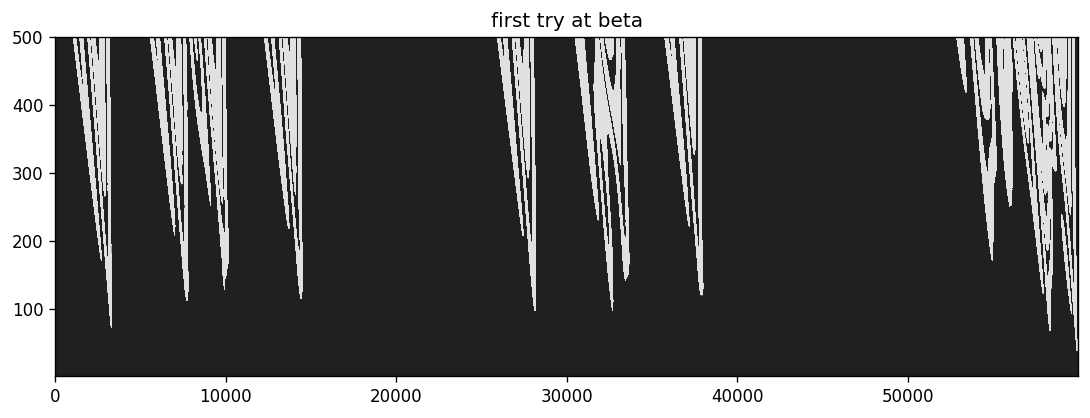

In [30]:
a = PlotFingerPrint([test, 'first try at beta'])

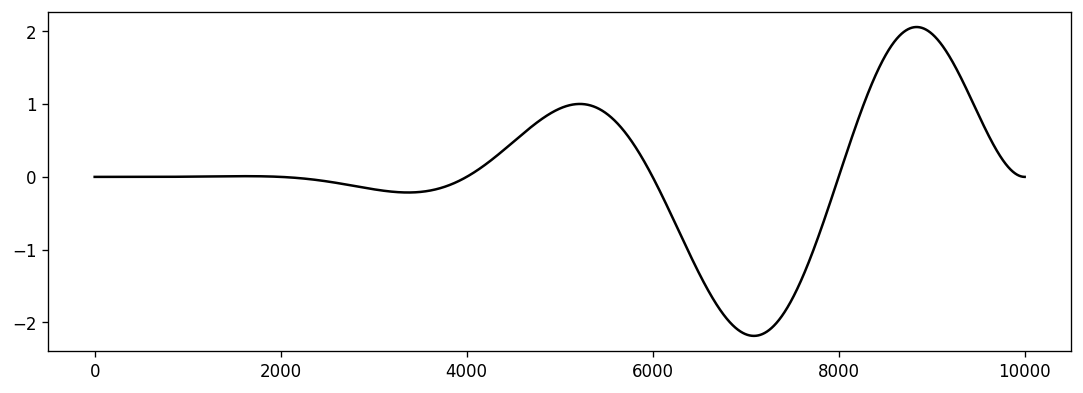

In [44]:
fig=plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
y =BetaWavelet(10000, 2,  5, 5, 0)[0]
plt.plot(y, label = 'Beta Wavelet')
plt.show()
#BetaWavelet(sizes, a = 2, b = 5, cycle = 4)

In [26]:
Ridges = RidgeCount(test)

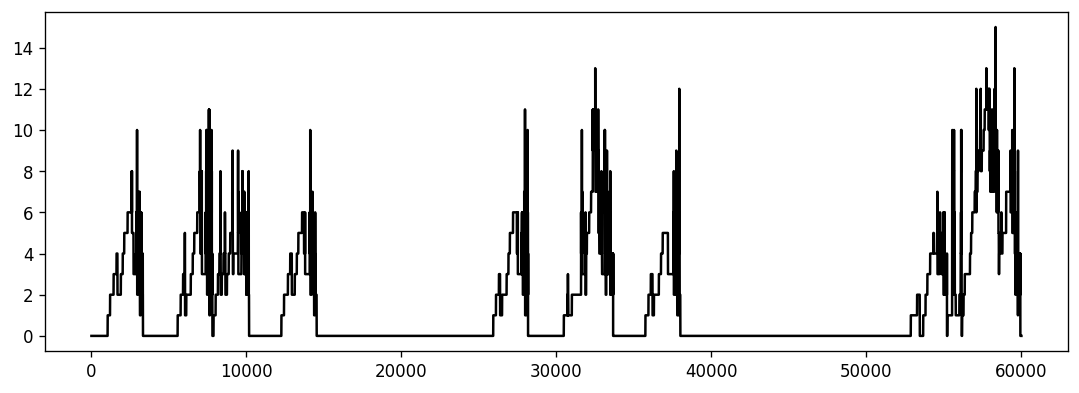

In [27]:
fig=plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(Ridges, label = 'Beta Wavelet Derived Ridgecount')
plt.show()